# Jamie's Notebook - Phase 3 Project

## Project Requirements:

Problem First: Start with a problem that you are interested in that you could potentially solve with a classification model. Then look for data that you could use to solve that problem. This approach is high-risk, high-reward: Very rewarding if you are able to solve a problem you are invested in, but frustrating if you end up sinking lots of time in without finding appropriate data. To mitigate the risk, set a firm limit for the amount of time you will allow yourself to look for data before moving on to the Data First approach.

Data First: Take a look at some of the most popular internet repositories of cool data sets we've listed below. If you find a data set that's particularly interesting for you, then it's totally okay to build your problem around that data set.

### Car Crash data:

Build a classifier to predict the primary contributory cause of a car accident, given information about the car, the people in the car, the road conditions etc. You might imagine your audience as a Vehicle Safety Board who's interested in reducing traffic accidents, or as the City of Chicago who's interested in becoming aware of any interesting patterns. Note that there is a multi-class classification problem. You will almost certainly want to bin or trim or otherwise limit the number of target categories on which you ultimately predict. Note e.g. that some primary contributory causes have very few samples.

### Stakeholder
> ?

### Business Problem
> ?

### Column Descriptions
* CRASH_RECORD_ID	: This number can be used to link to the same crash in the Vehicles and People datasets. This number also serves as a unique ID in this dataset.
* RD_NO	: Chicago Police Department report number. For privacy reasons, this column is blank for recent crashes.

* CRASH_DATE_EST_I: Crash date estimated by desk officer or reporting party (only used in cases where crash is reported at police station days after the crash)
* CRASH_DATE : Date and time of crash as entered by the reporting officer
* POSTED_SPEED_LIMIT : Posted speed limit, as determined by reporting officer
* TRAFFIC_CONTROL_DEVICE: Traffic control device present at crash location, as determined by reporting officer
* DEVICE_CONDITION: Condition of traffic control device, as determined by reporting officer
* WEATHER_CONDITION	: Weather condition at time of crash, as determined by reporting officer
* LIGHTING_CONDITION: Light condition at time of crash, as determined by reporting officer
* FIRST_CRASH_TYPE	: Type of first collision in crash
* TRAFFICWAY_TYPE	: Trafficway type, as determined by reporting officer
* LANE_CNT	: Total number of through lanes in either direction, excluding turn lanes, as determined by reporting officer (0 = intersection)
* ALIGNMENT	: Street alignment at crash location, as determined by reporting officer
* ROADWAY_SURFACE_COND	: Road surface condition, as determined by reporting officer
* ROAD_DEFECT	: Road defects, as determined by reporting officer
* REPORT_TYPE	: Administrative report type (at scene, at desk, amended)
* CRASH_TYPE	: A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away
* INTERSECTION_RELATED_I: A field observation by the police officer whether an intersection played a role in the crash. Does not represent whether or not the crash occurred within the intersection.
* NOT_RIGHT_OF_WAY_I	: Whether the crash begun or first contact was made outside of the public right-of-way.
* HIT_AND_RUN_I	: Crash did/did not involve a driver who caused the crash and fled the scene without exchanging information and/or rendering aid
* DAMAGE: A field observation of estimated damage.
* DATE_POLICE_NOTIFIED	: Calendar date on which police were notified of the crash
* PRIM_CONTRIBUTORY_CAUSE	: The factor which was most significant in causing the crash, as determined by officer judgment
* SEC_CONTRIBUTORY_CAUSE: The factor which was second most significant in causing the crash, as determined by officer judgment
* STREET_NO	: Street address number of crash location, as determined by reporting officer
* STREET_DIRECTION	: Street address direction (N,E,S,W) of crash location, as determined by reporting officer
* STREET_NAME	: Street address name of crash location, as determined by reporting officer
* BEAT_OF_OCCURRENCE: Chicago Police Department Beat ID. Boundaries available at https://data.cityofchicago.org/d/aerh-rz74
* PHOTOS_TAKEN_I: Whether the Chicago Police Department took photos at the location of the crash
* STATEMENTS_TAKEN_I	: Whether statements were taken from unit(s) involved in crash
* DOORING_I	: Whether crash involved a motor vehicle occupant opening a door into the travel path of a bicyclist, causing a crash
* WORK_ZONE_I	: Whether the crash occurred in an active work zone
* WORK_ZONE_TYPE	: The type of work zone, if any
* WORKERS_PRESENT_I	: Whether construction workers were present in an active work zone at crash location
* NUM_UNITS	: Number of units involved in the crash. A unit can be a motor vehicle, a pedestrian, a bicyclist, or another non-passenger roadway user. Each unit represents a mode of traffic with an independent trajectory.
* MOST_SEVERE_INJURY: Most severe injury sustained by any person involved in the crash
* INJURIES_TOTAL: Total persons sustaining fatal, incapacitating, non-incapacitating, and possible injuries as determined by the reporting officer
* INJURIES_FATAL	: Total persons sustaining fatal injuries in the crash
* INJURIES_INCAPACITATING	: Total persons sustaining incapacitating/serious injuries in the crash as determined by the reporting officer. Any injury other than fatal injury, which prevents the injured person from walking, driving, or normally continuing the activities they were capable of performing before the injury occurred. Includes severe lacerations, broken limbs, skull or chest injuries, and abdominal injuries.
* INJURIES_NON_INCAPACITATING: Total persons sustaining non-incapacitating injuries in the crash as determined by the reporting officer. Any injury, other than fatal or incapacitating injury, which is evident to observers at the scene of the crash. Includes lump on head, abrasions, bruises, and minor lacerations.
* INJURIES_REPORTED_NOT_EVIDENT	: Total persons sustaining possible injuries in the crash as determined by the reporting officer. Includes momentary unconsciousness, claims of injuries not evident, limping, complaint of pain, nausea, and hysteria.
* INJURIES_NO_INDICATION: Total persons sustaining no injuries in the crash as determined by the reporting officer
* INJURIES_UNKNOWN	: Total persons for whom injuries sustained, if any, are unknown
* CRASH_HOUR: The hour of the day component of CRASH_DATE.
* CRASH_DAY_OF_WEEK	: The day of the week component of CRASH_DATE. Sunday=1
* CRASH_MONTH: The month component of CRASH_DATE.
* LATITUDE	: The latitude of the crash location, as determined by reporting officer, as derived from the reported address of crash
* LONGITUDE	The longitude of the crash location, as determined by reporting officer, as derived from the reported address of crash
* LOCATION: The crash location, as determined by reporting officer, as derived from the reported address of crash, in a column type that allows for mapping and other geographic analysis in the data portal software


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# EDA

Crash data shows information about each traffic crash on city streets within the **City of Chicago** limits and under the jurisdiction of Chicago Police Department (CPD). Data are shown as is from the electronic crash reporting system (E-Crash) at CPD, excluding any personally identifiable information. Records are added to the data portal when a crash report is finalized or when amendments are made to an existing report in E-Crash. Data from E-Crash are available for some police districts in 2015, but citywide data are not available until September 2017. About half of all crash reports, mostly minor crashes, are self-reported at the police district by the driver(s) involved and the other half are recorded at the scene by the police officer responding to the crash. Many of the crash parameters, including street condition data, weather condition, and posted speed limits, are recorded by the reporting officer based on best available information at the time, but many of these may disagree with posted information or other assessments on road conditions. If any new or updated information on a crash is received, the reporting officer may amend the crash report at a later time. A traffic crash within the city limits for which CPD is not the responding police agency, typically crashes on interstate highways, freeway ramps, and on local roads along the City boundary, are excluded from this dataset.

All crashes are recorded as per the format specified in the Traffic Crash Report, SR1050, of the Illinois Department of Transportation. **As per Illinois statute, only crashes with a property damage value of *1,500 or more* or involving bodily injury to any person(s) and that happen on a public roadway and that involve at least one moving vehicle, except bike dooring, are considered reportable crashes.** However, CPD records every reported traffic crash event, regardless of the statute of limitations, and hence any formal Chicago crash dataset released by Illinois Department of Transportation may not include all the crashes listed here.

In [79]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [177]:
# read in file
# Source: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if 
crashes = pd.read_csv('traffic_crashes_chicago.csv')

In [33]:
people = pd.read_csv('traffic_crashes_people.csv', low_memory=False)

In [588]:
vehicles = pd.read_csv('traffic_crashes_vehicles.csv', low_memory=False)

In [589]:
vehicles.columns

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE',
       'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       '

In [37]:
for col in people.columns:
    print(f'This is {col}:\n\n', people[col].value_counts(sort=True), '\n\n')

This is PERSON_ID:

 O783274    1
O198847    1
O924629    1
O862379    1
P202812    1
          ..
O883508    1
P65500     1
O605385    1
O2786      1
O892601    1
Name: PERSON_ID, Length: 1068637, dtype: int64 


This is PERSON_TYPE:

 DRIVER                 829557
PASSENGER              218362
PEDESTRIAN              12358
BICYCLE                  7209
NON-MOTOR VEHICLE         951
NON-CONTACT VEHICLE       200
Name: PERSON_TYPE, dtype: int64 


This is CRASH_RECORD_ID:

 31ecf6862c691ff12d3856213b902c146b07337b42a5692e3a176a66d684d221028bb5118ef6d67a313bcaed9e97bee1855cb1f5e8650f49e8dc17663475a1ee    61
13026c7fb51566d9ca487a093e38c6f5621c2ec25be48c306b6574983b61daeee589524b96bb2bfe66ddd0f695c8d2bf3ab0297558528e9c7a70363c763d6bd1    50
1829f52c1281a0396ef94692331b3dc530bc4be5a54cd55e94c24a5e5e49b800fbcf9f24dabe4c8277c8964ad05aadc89e90fd94021959d6dff5fad55480d595    46
c727dc759107cf17b2e8141149347128bb4bc26b026c7805562206c7c5761c543dd7cc0e47fc11379455a2ecbb2847c3d1744d6feb78f276d9a4

This is PHYSICAL_CONDITION:

 NORMAL                          570544
UNKNOWN                         262241
IMPAIRED - ALCOHOL                4148
REMOVED BY EMS                    3307
OTHER                             2351
FATIGUED/ASLEEP                   2252
EMOTIONAL                         1755
ILLNESS/FAINTED                    766
HAD BEEN DRINKING                  680
IMPAIRED - DRUGS                   498
IMPAIRED - ALCOHOL AND DRUGS       184
MEDICATED                          107
Name: PHYSICAL_CONDITION, dtype: int64 


This is PEDPEDAL_ACTION:

 CROSSING - WITH SIGNAL                               4107
WITH TRAFFIC                                         3236
UNKNOWN/NA                                           2626
OTHER ACTION                                         2586
NO ACTION                                            1026
CROSSING - AGAINST SIGNAL                             997
NOT AT INTERSECTION                                   881
CROSSING - NO CONTROLS (NOT

In [47]:
people.columns = [people.columns[i].lower() for i in range(len(people.columns))]

In [ ]:
# intakes['Intake Date'].describe()
# intakes['Intake Date'] =  pd.to_datetime(intakes['DateTime'])

In [5]:
# Marcos
def basic_info(data):
    print("Dataset shape is: ", data.shape)
    print("Dataset size is: ", data.size)
    print("Dataset columns are: ", data.columns)
    print("Dataset info is: ", data.info())
    categorical = []
    numerical = []
    for i in data.columns:
        if data[i].dtype == object:
            categorical.append(i)
        else:
            numerical.append(i)
    print("Categorical variables are:\n ", categorical)
    print("Numerical variables are:\n ", numerical)
    return categorical, numerical


In [178]:
crashes.columns = [crashes.columns[i].lower() for i in range(len(crashes.columns))]

In [17]:
# !pip install imblearn

In [18]:

# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_sample(X, y)


In [179]:
crashes['time_of_crash'] = crashes['crash_date'].apply(
    lambda x: int(x[11:13]+x[14:16]+x[17:19]) if 'AM' in x else int((str(int(x[11:13])+12))+x[14:16]+x[17:19])
)
crashes['time_of_crash'].iloc[111]




150700

## Visualizations

##### Sources:

https://data.cityofchicago.org/browse?tags=gis

In [52]:
people_num = people[['zipcode', 'age', 'bac_result value']].dropna()

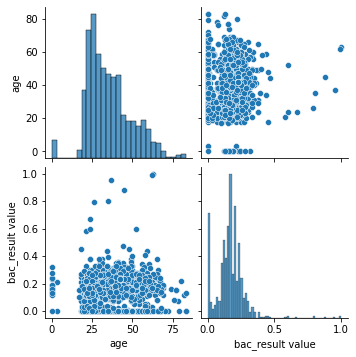

In [53]:
sns.pairplot(people_num)

In [54]:
people.sex.value_counts()

M    558366
F    404190
X     90265
Name: sex, dtype: int64

In [99]:
np.dtype('float')

dtype('float64')

In [56]:
people.injury_classification.value_counts()

NO INDICATION OF INJURY     982188
NONINCAPACITATING INJURY     47584
REPORTED, NOT EVIDENT        28359
INCAPACITATING INJURY         9394
FATAL                          547
Name: injury_classification, dtype: int64

In [63]:
# Comparing number of crashes Male v Female
# Source = https://www.python-graph-gallery.com/11-grouped-barplot

# barWidth = .2
 
# # set heights of bars
# labels = ['Male', 'Female']

# num_crashes_sex = [len(people[people['sex']=='M']), len(people[people['sex']=='F'])]
# num_bad_cr_sex = [len(people[(people['sex']=='M')&((people['injury_classification']=='INCAPACITATING INJURY')|(people['injury_classification']=='FATAL'))]), 
#                   len(people[(people['sex']=='F')&((people['injury_classification']=='INCAPACITATING INJURY')|(people['injury_classification']=='FATAL'))])]

# r1 = np.arange(len(num_crashes_sex))
# r2 = [x + barWidth for x in r1]

# plt.bar(r1, num_crashes_sex, color='#7f6d5f', width=barWidth, edgecolor='white', label='Total Number of Crashes')
# plt.bar(r2, num_bad_cr_sex, color='#557f2d', width=barWidth, edgecolor='white', label='Total Number of Crashes with INCAPACITATING or FATAL Injuries')

# plt.xticks([r + barWidth for r in range(len(num_crashes_sex))], ['Male', 'Female'])

# plt.legend()


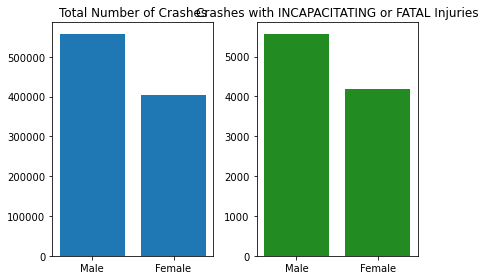

In [69]:
# RENAME WITH CRASHES INSTEAD OF DATA
fig, (ax1, ax2) = plt.subplots(ncols=2)
num_crashes_sex = [len(people[people['sex']=='M']), len(people[people['sex']=='F'])]
num_bad_cr_sex = [len(people[(people['sex']=='M')&((people['injury_classification']=='INCAPACITATING INJURY')|(people['injury_classification']=='FATAL'))]), 
                  len(people[(people['sex']=='F')&((people['injury_classification']=='INCAPACITATING INJURY')|(people['injury_classification']=='FATAL'))])]

ax1.bar(['Male', 'Female'], num_crashes_sex)
ax1.set_title('Total Number of Crashes')

ax2.bar(['Male', 'Female'], num_bad_cr_sex, color='forestgreen')
ax2.set_title('Crashes with INCAPACITATING or FATAL Injuries')
plt.tight_layout()

In [12]:
# Plotting numerical variables in pairplot
# RENAME CRASHES INSTEAD OF DATA
numerical = data[['latitude', 'longitude', 'time_of_crash', 'month', 'posted_speed_limit', 
                 'injuries_fatal', 'injuries_incapacitating', 'day', 'injuries_no_indication']].dropna()


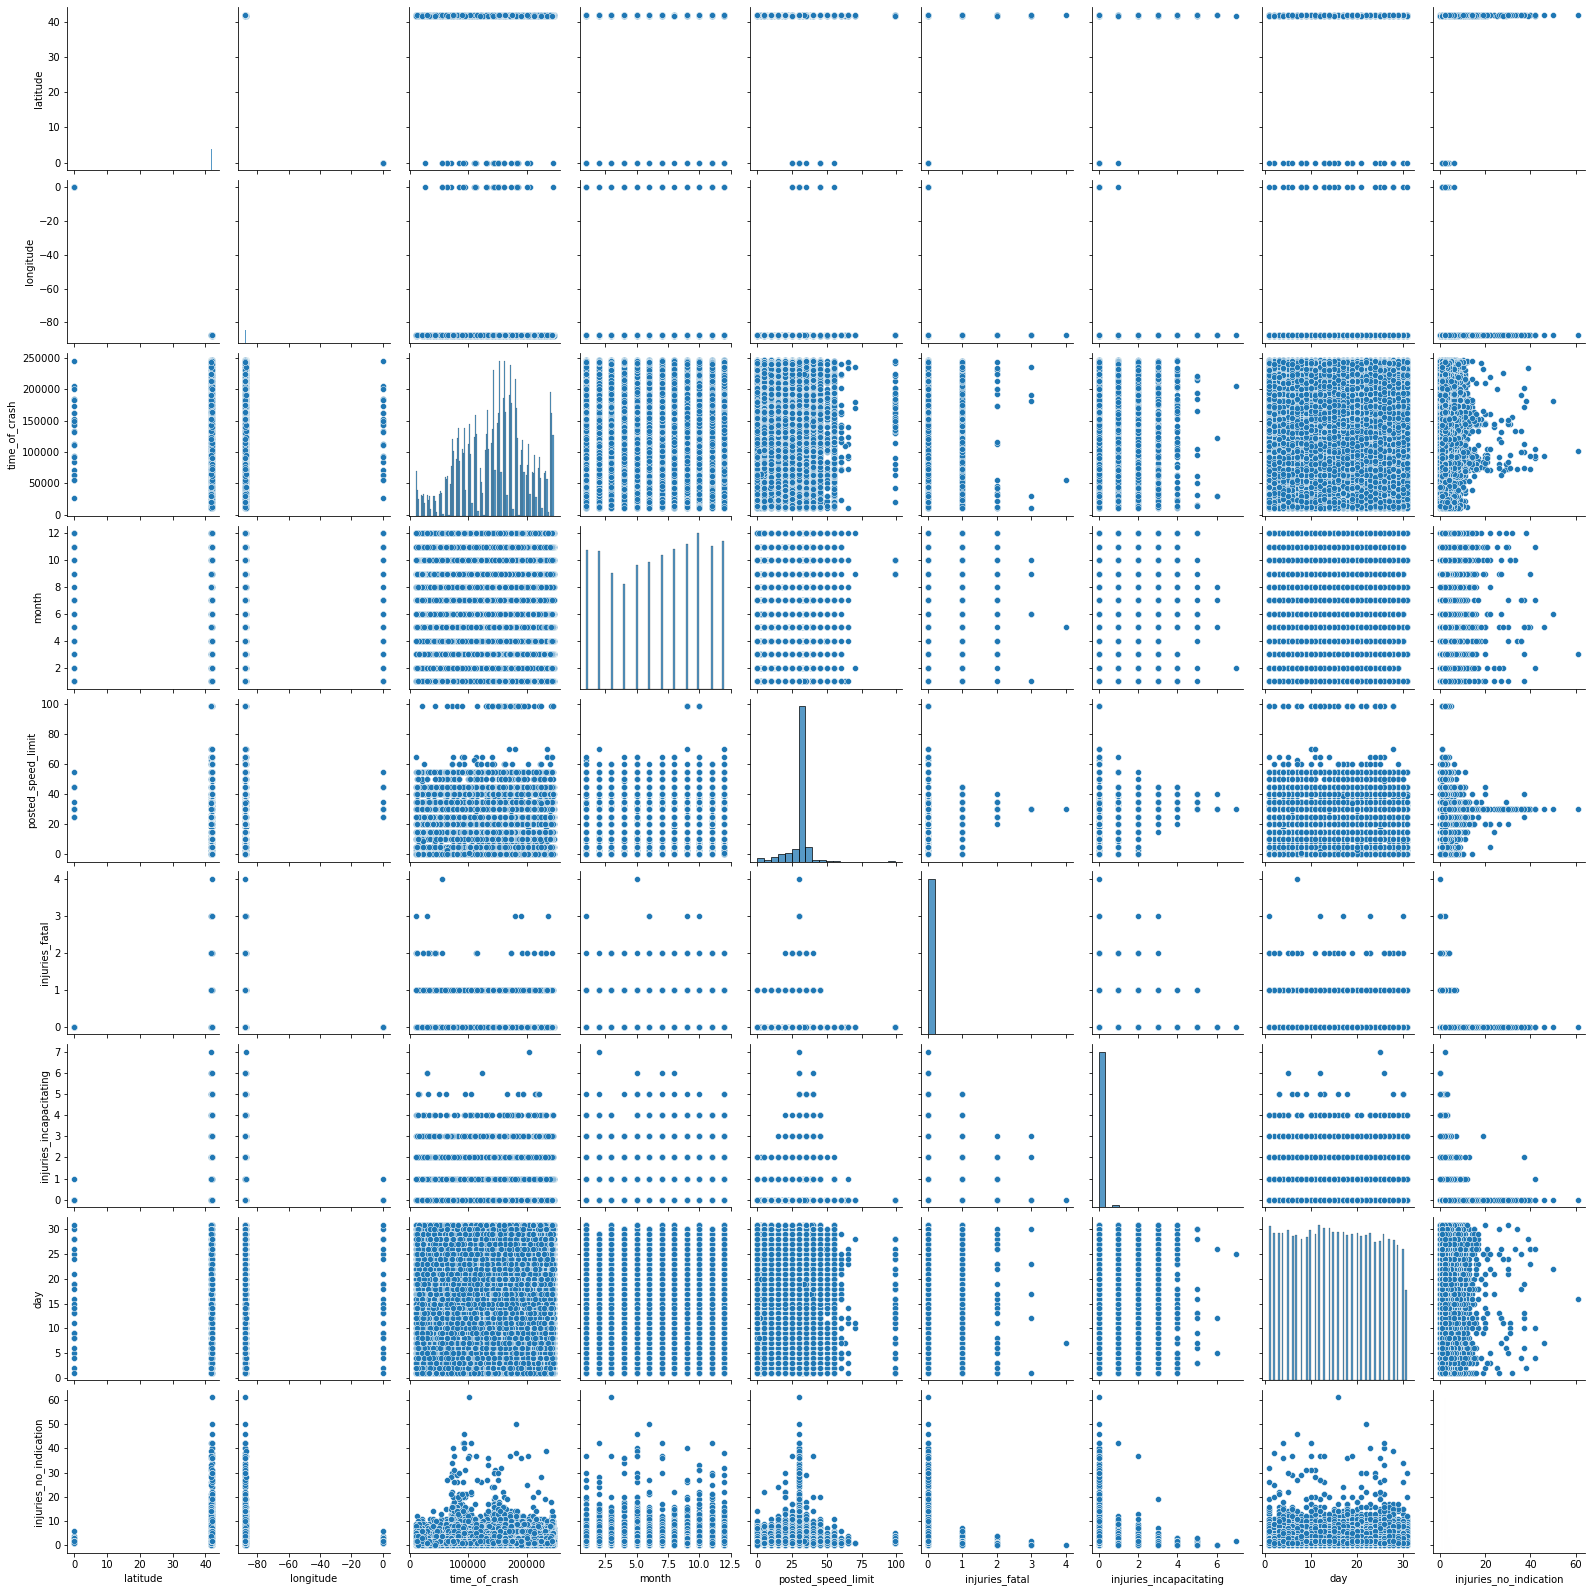

In [13]:
sns.pairplot(numerical)

In [14]:
numerical.corr()

,latitude,longitude,time_of_crash,month,posted_speed_limit,injuries_fatal,injuries_incapacitating,day,injuries_no_indication
latitude,1.000000,-0.975358,0.001238,0.000563,-0.001329,-0.002712,-0.003236,0.000368,0.001808
longitude,-0.975358,1.000000,-0.000440,-0.000500,0.005909,0.000123,0.000768,0.000293,0.000954
time_of_crash,0.001238,-0.000440,1.000000,0.008749,0.011178,-0.006440,-0.005624,0.010721,0.069994
month,0.000563,-0.000500,0.008749,1.000000,0.011731,0.001144,0.005961,0.013068,-0.000610
posted_speed_limit,-0.001329,0.005909,0.011178,0.011731,1.000000,0.005962,0.029551,0.002561,0.098820
injuries_fatal,-0.002712,0.000123,-0.006440,0.001144,0.005962,1.000000,0.045952,-0.001212,-0.029317
injuries_incapacitating,-0.003236,0.000768,-0.005624,0.005961,0.029551,0.045952,1.000000,0.000959,-0.077464
day,0.000368,0.000293,0.010721,0.013068,0.002561,-0.001212,0.000959,1.000000,-0.001005
injuries_no_indication,0.001808,0.000954,0.069994,-0.000610,0.098820,-0.029317,-0.077464,-0.001005,1.000000


In [15]:
def corr_table(df):
    """
    Creates a table of correlations and their corresponding variables (listed as a tuple)
    Arguments:
        df - pandas.DataFrame.corr()
    
    Returns: Dataframe with a list of variable pairs and their corresponding correlation coefficients
    """
    best_corrs = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

    best_corrs['pairs'] = list(zip(best_corrs.level_0, best_corrs.level_1))

    best_corrs.set_index(['pairs'], inplace = True)

    #d rop level columns
    best_corrs.drop(columns=['level_1', 'level_0'], inplace = True)
    
    best_corrs.columns = ['cc']
    
    best_corrs.drop_duplicates(inplace=True)
    best_corrs = best_corrs[best_corrs['cc']<1.0]
    
    return best_corrs

In [16]:
corr_table(numerical)

,cc
pairs,
"(latitude, longitude)",0.975358
"(injuries_no_indication, posted_speed_limit)",0.098820
"(injuries_no_indication, injuries_incapacitating)",0.077464
"(time_of_crash, injuries_no_indication)",0.069994
"(injuries_fatal, injuries_incapacitating)",0.045952
"(injuries_incapacitating, posted_speed_limit)",0.029551
"(injuries_no_indication, injuries_fatal)",0.029317
"(day, month)",0.013068
"(month, posted_speed_limit)",0.011731


In [23]:
import geopandas as gpd

chitown = gpd.read_file('data/Public_Expressway_Crash_Rates_2008_2012.shp')

<ipython-input-25-689db38e68ed>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(street_names, rotation=45)


[Text(0, 0, 'WESTERN AVE'),
 Text(1, 0, 'PULASKI RD'),
 Text(2, 0, 'CICERO AVE'),
 Text(3, 0, 'ASHLAND AVE'),
 Text(4, 0, 'HALSTED ST'),
 Text(5, 0, 'KEDZIE AVE'),
 Text(6, 0, 'MICHIGAN AVE'),
 Text(7, 0, 'STATE ST'),
 Text(8, 0, 'NORTH AVE'),
 Text(9, 0, 'CLARK ST')]

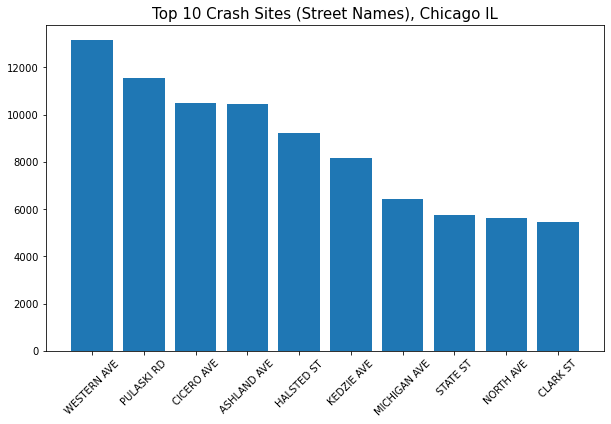

In [25]:
# Top 5 Crash streets
# RENAME CRASHES INSTEAD OF DATA
fig, ax = plt.subplots(figsize=(10,6))

street_names = data.street_name.value_counts(sort=True).index[:10]
crash_frequency = data.street_name.value_counts(sort=True).values[:10]

ax.bar(street_names, crash_frequency)
ax.set_title('Top 10 Crash Sites (Street Names), Chicago IL', size=15)
ax.set_xticklabels(street_names, rotation=45)

In [27]:
data.latitude.value_counts()

41.976201    619
41.791420    326
41.751461    321
41.722257    267
41.900959    246
            ... 
41.802244      1
41.959765      1
41.864285      1
41.702748      1
41.920839      1
Name: latitude, Length: 210866, dtype: int64

In [28]:
data.longitude.dtype

dtype('float64')

<AxesSubplot:>

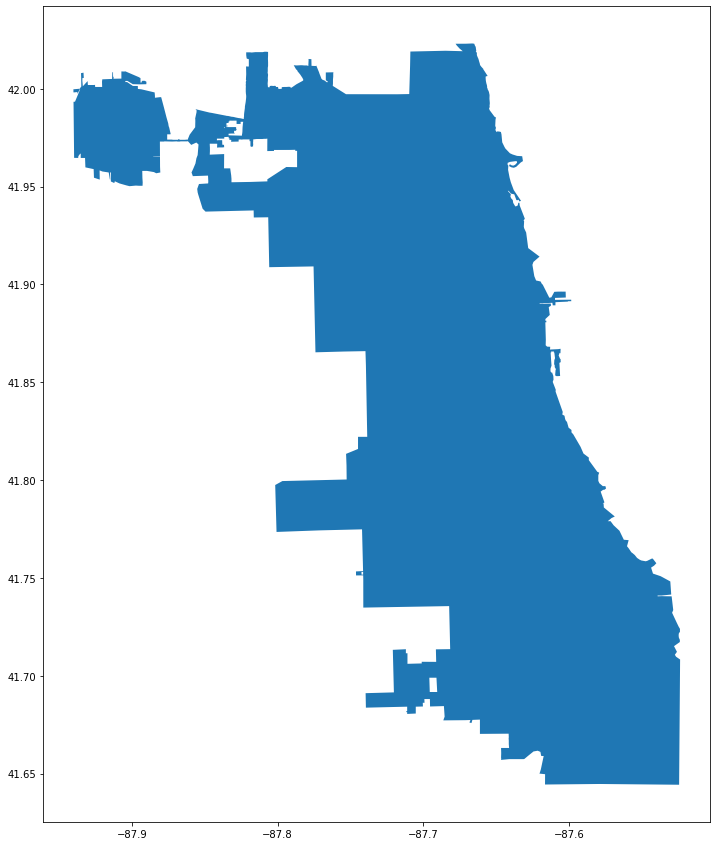

In [29]:
locations = data[['latitude', 'longitude']].dropna()
chiboundaries = gpd.read_file('data/chipoli.shp')

fig, ax = plt.subplots(figsize=(15,15))

chiboundaries.plot(ax=ax)

In [30]:
locations = data[data['latitude']!=0]
locations

,crash_record_id,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,...,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,month,day,year,time_of_crash
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993),7,10,2019,175600
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989),6,30,2017,160000
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008),7,10,2020,102500
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011),7,11,2020,10000
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,14,4,7,NaN,NaN,NaN,7,8,2020,140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482861,f37d01cdad7c3e9fe01562aa11857405cc2ea38738d8b6...,JE116847,NaN,01/19/2021 07:30:00 AM,15,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,FIXED OBJECT,...,7,3,1,41.877790,-87.636488,POINT (-87.636487589354 41.877790161619),1,19,2021,73000
482862,f1dba052d8fc8c80d3d693296ff8e0d7cc71d5929677b0...,JE118336,NaN,01/20/2021 05:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,...,17,4,1,41.800697,-87.706358,POINT (-87.706357916164 41.800697419369),1,20,2021,175000
482863,f2962f241a302417913e1b7465e8ae37e6f3161adaa0cf...,JE118196,NaN,01/20/2021 04:15:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,16,4,1,41.924709,-87.717371,POINT (-87.717371333013 41.924708659649),1,20,2021,161500
482864,f361f7362d783dc327e5e6b7d2d9bc4bd942284391ad36...,JE118233,NaN,01/20/2021 03:20:00 PM,30,STOP SIGN/FLASHER,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,ANGLE,...,15,4,1,41.802871,-87.684416,POINT (-87.684416341899 41.802870816721),1,20,2021,152000


<ipython-input-38-57e54a7f51e6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(weather_conditions, rotation=45)


[Text(0, 0, 'CLEAR'),
 Text(1, 0, 'RAIN'),
 Text(2, 0, 'UNKNOWN'),
 Text(3, 0, 'SNOW'),
 Text(4, 0, 'CLOUDY/OVERCAST'),
 Text(5, 0, 'OTHER'),
 Text(6, 0, 'FOG/SMOKE/HAZE'),
 Text(7, 0, 'SLEET/HAIL'),
 Text(8, 0, 'FREEZING RAIN/DRIZZLE'),
 Text(9, 0, 'BLOWING SNOW'),
 Text(10, 0, 'SEVERE CROSS WIND GATE'),
 Text(11, 0, 'BLOWING SAND, SOIL, DIRT')]

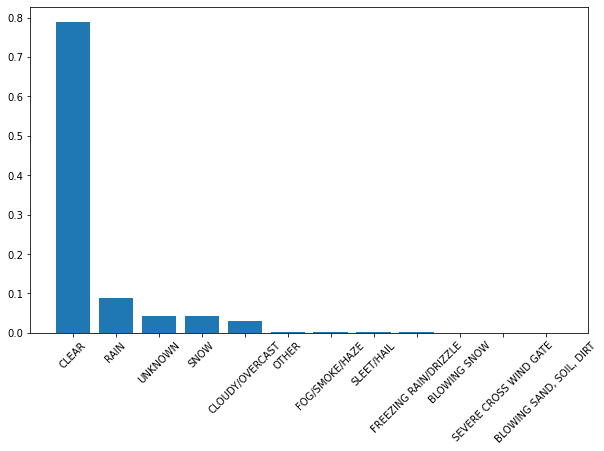

In [38]:
# comparing crash frequency and weather condition
# RENAME CRASHES INSTEAD OF DATA
fig, ax = plt.subplots(figsize=(10,6))

weather_conditions = data.weather_condition.value_counts(sort=True).index
weather_frequencies = data.weather_condition.value_counts(sort=True, normalize=True).values

ax.bar(weather_conditions, weather_frequencies)
ax.set_xticklabels(weather_conditions, rotation=45)

In [39]:
data.road_defect.value_counts(sort=True).index

Index(['NO DEFECTS', 'UNKNOWN', 'RUT, HOLES', 'OTHER', 'WORN SURFACE',
       'SHOULDER DEFECT', 'DEBRIS ON ROADWAY'],
      dtype='object')

Text(0.5, 1.0, 'types of road defects')

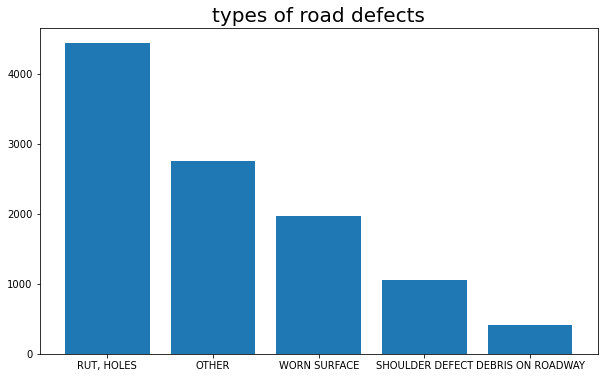

In [40]:
# RENAME CRASHES INSTEAD OF DATA
fig, ax = plt.subplots(figsize=(10,6))

defect_types = data.road_defect.value_counts(sort=True).index[2:]

frequency = data.road_defect.value_counts(sort=True).values[2:]

ax.bar(defect_types, frequency)
ax.set_title('types of road defects', size=20)

Text(0.5, 1.0, 'Number of Crashes with INCAPACITATING or FATAL Injuries sorted by Time of Day')

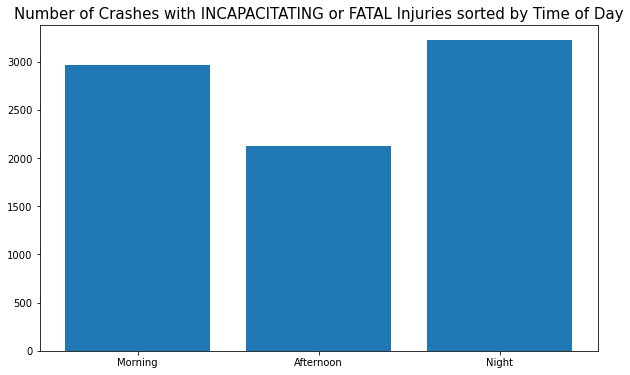

In [42]:
# Comparing distribution of incapacitating/fatal injuries and time of day
# RENAME CRASHES INSTEAD OF DATA
fig, ax = plt.subplots(figsize=(10,6))
crash_times = ['Morning', 'Afternoon', 'Night']
crash_counts_injuries = [
               len(data[(data['time_of_crash']<120000)&((data['most_severe_injury']=='INCAPACITATING INJURY')|(data['most_severe_injury']=='FATAL'))]),
               len(data[(data['time_of_crash']>=120000)&(data['time_of_crash']<170000)&((data['most_severe_injury']=='INCAPACITATING INJURY')|(data['most_severe_injury']=='FATAL'))]),
               len(data[(data['time_of_crash']>=170000)&((data['most_severe_injury']=='INCAPACITATING INJURY')|(data['most_severe_injury']=='FATAL'))])
               ]

ax.bar(crash_times, crash_counts_injuries)
ax.set_title('Number of Crashes with INCAPACITATING or FATAL Injuries sorted by Time of Day', size=15)

Text(0.5, 1.0, 'Number of Crashes based on Time of Day, Chicago, IL')

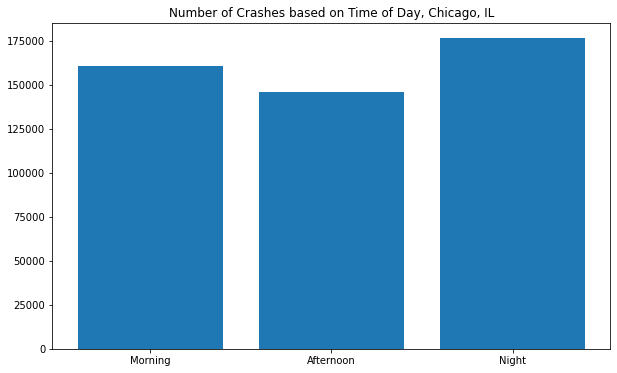

In [43]:
# Comparing distribution of crash times
# RENAME CRASHES INSTEAD OF DATA
fig, ax = plt.subplots(figsize=(10,6))
crash_times = ['Morning', 'Afternoon', 'Night']
crash_counts = [
               len(data['time_of_crash'][data['time_of_crash']<120000]),
               len(data['time_of_crash'][(data['time_of_crash']>=120000)&(data['time_of_crash']<170000)]),
               len(data['time_of_crash'][(data['time_of_crash']>=170000)])
               ]
ax.bar(crash_times, crash_counts)
ax.set_title('Number of Crashes based on Time of Day, Chicago, IL')

<ipython-input-45-9142836e6fc8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(causes, rotation=90)


[Text(0, 0, 'UNABLE TO DETERMINE'),
 Text(1, 0, 'FAILING TO YIELD RIGHT-OF-WAY'),
 Text(2, 0, 'FOLLOWING TOO CLOSELY'),
 Text(3, 0, 'NOT APPLICABLE'),
 Text(4, 0, 'IMPROPER OVERTAKING/PASSING'),
 Text(5, 0, 'IMPROPER BACKING'),
 Text(6, 0, 'FAILING TO REDUCE SPEED TO AVOID CRASH'),
 Text(7, 0, 'IMPROPER LANE USAGE'),
 Text(8, 0, 'IMPROPER TURNING/NO SIGNAL'),
 Text(9, 0, 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE')]

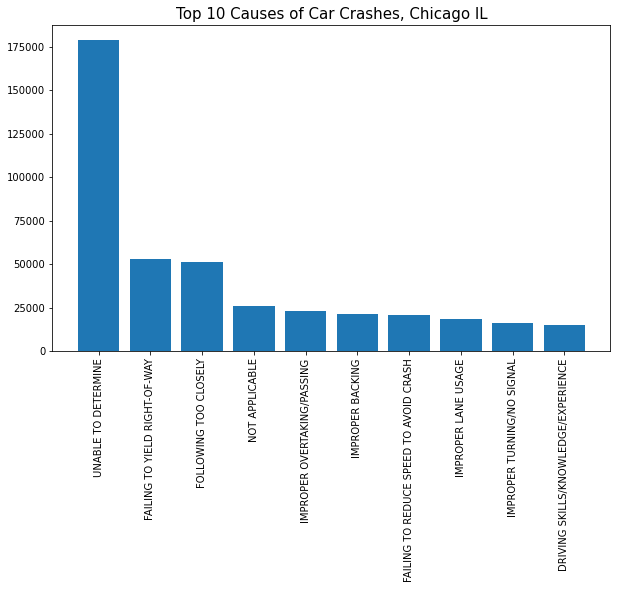

In [45]:
# Top 10 primary causes of car crashes
# RENAME CRASHES INSTEAD OF DATA
fig, ax = plt.subplots(figsize=(10,6))
causes = data.prim_contributory_cause.value_counts(sort=True).index[:10]
cause_freq = data.prim_contributory_cause.value_counts(sort=True).values[:10]

ax.bar(causes, cause_freq)
ax.set_title('Top 10 Causes of Car Crashes, Chicago IL', size=15)
ax.set_xticklabels(causes, rotation=90)

<ipython-input-17-c422ed1da2d5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(causes, rotation=90)


[Text(0, 0, 'FAILING TO REDUCE SPEED TO AVOID CRASH'),
 Text(1, 0, 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE'),
 Text(2, 0, 'FAILING TO YIELD RIGHT-OF-WAY'),
 Text(3, 0, 'FOLLOWING TOO CLOSELY'),
 Text(4, 0, 'IMPROPER OVERTAKING/PASSING'),
 Text(5, 0, 'IMPROPER LANE USAGE'),
 Text(6, 0, 'WEATHER'),
 Text(7, 0, 'IMPROPER TURNING/NO SIGNAL'),
 Text(8, 0, 'IMPROPER BACKING'),
 Text(9, 0, 'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER')]

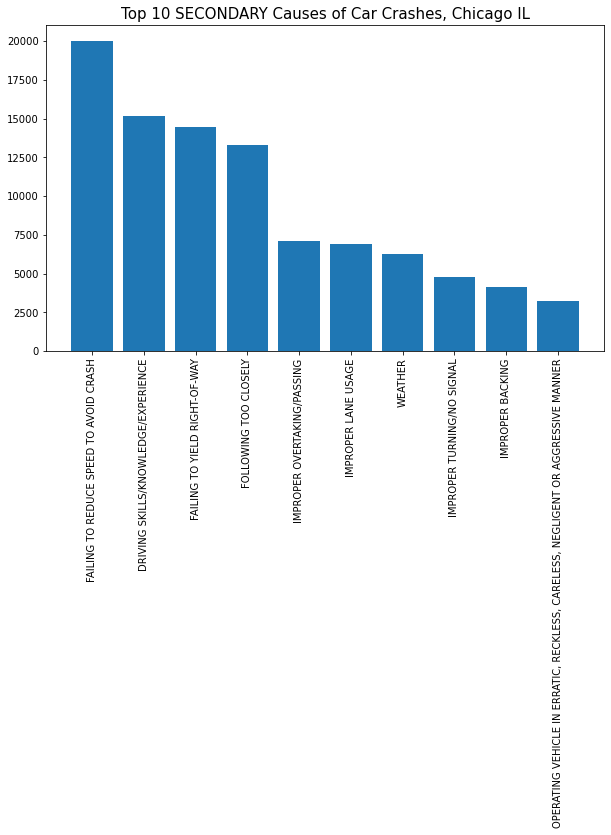

In [17]:
# RENAME CRASHES INSTEAD OF DATA
fig, ax = plt.subplots(figsize=(10,6))
causes = data.sec_contributory_cause.value_counts(sort=True).index[2:12]
cause_freq = data.sec_contributory_cause.value_counts(sort=True).values[2:12]

ax.bar(causes, cause_freq)
ax.set_title('Top 10 SECONDARY Causes of Car Crashes, Chicago IL', size=15)
ax.set_xticklabels(causes, rotation=90)

([<matplotlib.axis.XTick at 0x7fda88cd1280>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

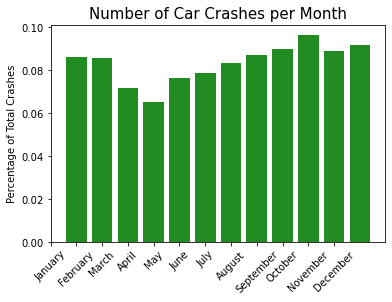

In [25]:
# RENAME CRASHES INSTEAD OF DATA
import calendar

months = [i for i in range(1,13)]

num_crashes = [len(data[data['month']==i])/len(data) for i in months]

plt.bar(months, num_crashes, color='forestgreen')
plt.title('Number of Car Crashes per Month', size=15)
plt.ylabel('Percentage of Total Crashes')
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=45)

In [56]:
data_fsm.corr()['dead?'].sort_values()

injuries_no_indication          -0.030195
beat_of_occurrence              -0.008643
crash_hour                      -0.006939
latitude                        -0.001544
crash_day_of_week               -0.001269
lane_cnt                        -0.000068
longitude                        0.001249
crash_month                      0.001604
num_units                        0.003139
injuries_reported_not_evident    0.003341
street_no                        0.005809
posted_speed_limit               0.006111
injuries_non_incapacitating      0.020244
injuries_incapacitating          0.042447
injuries_total                   0.091608
injuries_fatal                   0.955160
dead?                            1.000000
injuries_unknown                      NaN
Name: dead?, dtype: float64

/Users/jamiedowat/PySpace/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='injuries_total', ylabel='dead?'>

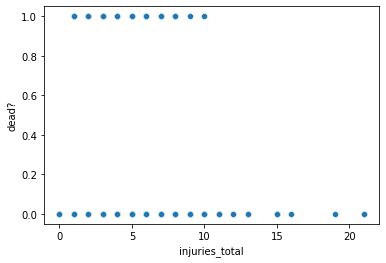

In [59]:
sns.scatterplot(data_fsm['injuries_total'], data_fsm['dead?'])

In [40]:
people.PHYSICAL_CONDITION.value_counts()

NORMAL                          570544
UNKNOWN                         262241
IMPAIRED - ALCOHOL                4148
REMOVED BY EMS                    3307
OTHER                             2351
FATIGUED/ASLEEP                   2252
EMOTIONAL                         1755
ILLNESS/FAINTED                    766
HAD BEEN DRINKING                  680
IMPAIRED - DRUGS                   498
IMPAIRED - ALCOHOL AND DRUGS       184
MEDICATED                          107
Name: PHYSICAL_CONDITION, dtype: int64

In [39]:
people.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

In [41]:
people.isna().sum()

PERSON_ID                      0
PERSON_TYPE                    0
CRASH_RECORD_ID                0
RD_NO                       7189
VEHICLE_ID                 21144
CRASH_DATE                     0
SEAT_NO                   850275
CITY                      278609
STATE                     269809
ZIPCODE                   347152
SEX                        15816
AGE                       304533
DRIVERS_LICENSE_STATE     434873
DRIVERS_LICENSE_CLASS     518352
SAFETY_EQUIPMENT            3170
AIRBAG_DEPLOYED            20238
EJECTION                   13190
INJURY_CLASSIFICATION        565
HOSPITAL                  874056
EMS_AGENCY                945068
EMS_RUN_NO               1048537
DRIVER_ACTION             220415
DRIVER_VISION             220695
PHYSICAL_CONDITION        219804
PEDPEDAL_ACTION          1048762
PEDPEDAL_VISIBILITY      1048805
PEDPEDAL_LOCATION        1048761
BAC_RESULT                219308
BAC_RESULT VALUE         1067260
CELL_PHONE_USE           1067480
dtype: int

In [43]:
people.DRIVER_VISION.value_counts()

NOT OBSCURED              465127
UNKNOWN                   360548
OTHER                       9021
MOVING VEHICLES             5306
PARKED VEHICLES             3180
WINDSHIELD (WATER/ICE)      2707
BLINDED - SUNLIGHT          1018
TREES, PLANTS                398
BUILDINGS                    344
BLINDED - HEADLIGHTS          83
BLOWING MATERIALS             68
HILLCREST                     65
EMBANKMENT                    55
SIGNBOARD                     22
Name: DRIVER_VISION, dtype: int64

In [42]:
people.BAC_RESULT.value_counts()

TEST NOT OFFERED                   836356
TEST REFUSED                         9173
TEST PERFORMED, RESULTS UNKNOWN      2182
TEST TAKEN                           1618
Name: BAC_RESULT, dtype: int64

## Models

************************************
> *Run with a random state `[i for i in range(0-10)]` *


### Processing Outline

* Target selection
    * 0 or >0 Fatalities
    * Primary Cause
    * Highest R*2
    * Choosing based on assumptions of predictive value
    
    
* Feature Selection / Engineering
    * All at once
    * Start with one
    
    * Datasets
        * Just Crash data
        * Crash & People Data
        * Crash & Vehicle Data
        * People Data
        * Vehicle Data
        * People & Vehicle Data
        * People & Vehicle & Crash Data
    
    * Remove NaNs
        * Remove NaNs based on columns (and "UNKNOWN" values)
            * Latitude/Longitude
            * Physical Condition
            * BAC test
            * Sex
            * PED Pedal Action
            * 
    * Impute NaNs
    * SMOTE data
    * Remove all features with multicollinearity   
    * Grouping:
        * Age
        * Speed limit
        * type of car
        * In vs Out of state DL
        * DL Class (normal vs non-normal?)
    
    * Linear SVC
    
    
* Data Prep
    * Train Test Split:
        * VARY Train-test Proportions
        * Stratified vs Non-Stratified
    * Impute NaNs:
        * Mean
        * Median
        * Mode
    * OHE
        * Drop first=True
        * Drop first=False
    * Standard Scaler
    * Power Transform??
    * Log Transform??
        
        
* Models
    * **Logistic Regression**
        * penalty='l2',
        * dual=False,
        * tol=0.0001,
        * C=1.0,
        * fit_intercept=True,
        * intercept_scaling=1,
        * class_weight=None,
        * random_state=None,
        * solver='lbfgs',
        * max_iter=100,
        * multi_class='auto',
        * verbose=0,
        * warm_start=False,
        * n_jobs=None,
        * l1_ratio=None,
    * **Ridge Regression**
    * **Least Absolute Shrinkage and Selection Operator (LASSO)**
    * **Huber Loss**
    * **Elastic Net**
    * **Least-Angle Regression (LARS)**
    * **KNN Classifier**
        * k (n_neighbors)
        * n_neighbors=5,
        * weights='uniform',
        * algorithm='auto',
        * leaf_size=30, -- BallTree or KDTree.  This can affect the speed of the construction and query, as well as the memory required to store the tree.  The optimal value depends on the nature of the problem.
        * p=2, -- Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance, (l1), and euclidean_distance (l2) for p = 2.
        * metric='minkowski',
        * metric_params=None,
        * n_jobs=None,
    * **RadiusNeighborsClassifier**
    * **Decision Tree**
        * criterion='gini', 'entropy'
        * splitter='best', 'random'
        * max_depth=None,-- The maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less than min_samples_split samples.
        * min_samples_split=2,
        * min_samples_leaf=1, The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left andright branches.  This may have the effect of smoothing the model, especially in regression.
        * min_weight_fraction_leaf=0.0, -- The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
        * max_features=None, "sqrt", "log2", "auto", or int/float -- The number of features to consider when looking for the best split
        * random_state=None,
        * max_leaf_nodes=None,
        * min_impurity_decrease=0.0,
        * min_impurity_split=None,
        * class_weight=None,
        * ccp_alpha=0.0,
    * **Naive Bayes**
        * `from sklearn.naive_bayes import GaussianNB`
        * `from sklearn.naive_bayes import MultinomialNB`
    * Averaged One-Dependence Estimators (AODE)
    * Bayesian Belief Network (BBN)
    * Bayesian Network (BN)

    * **Bernoulli**
    * **SGD?**
    * **Support Vector Machines**
    * **Learning Vector Quantization (LVQ)**
    * **Self-Organizing Map (SOM)**
    * **Locally Weighted Learning (LWL)**
    * Split into Batches (like in PyTorch)???
    * **k-Means (Clustering)**
        * from sklearn.cluster import KMeans
        * `KMeans(algorithm=’auto’, copy_x=True, init=’k-means++’, max_iter=300, n_clusters=2, n_init=10, n_jobs=1, precompute_distances=’auto’, random_state=None, tol=0.0001, verbose=0)`
    * **k-Medians**
    * **Expectation Maximisation (EM)**
    * **Hierarchical Clustering**
    * **Eclat**
    * **Apriori**
    * **Multivariate Adaptive Regression Splines (MARS)**
    * **Locally Estimated Scatterplot Smoothing (LOESS)**
    * **Distillation**
    * **Random Forest (ENSEMBLE)**:
        * `from sklearn.ensemble import RandomForestClassifier`
        * `RandomForestClassifier(bootstrap=True, class_weight=None, criterion=’gini’,max_depth=None, max_features=’auto’, max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,oob_score=False, random_state=None, verbose=0,warm_start=False)`
    
    
    * **Boosting**
    * **Bootstrapped Aggregation (Bagging)**
    * **AdaBoost**
    * **Weighted Average (Blending)**
    * **Stacked Generalization (Stacking)**
    * **Gradient Boosting Machines (GBM)**
    * **Gradient Boosted Regression Trees (GBRT)**
    * **GBM**
    * **XGBoost**
    * **LightGBM**
    * **CatBoost**
    
    * **GRIDSEARCH CV** (for the above)
        * gs.cv_results_
        
    * **RANDOMIZED SEARCH CV (for continuous hyperparameters**
        * log_reg_grid = {'C': stats.uniform(loc=0, scale=10),
               'l1_ratio': stats.expon(scale=0.2)}
    
* Diagnostics - Training Set
    * Confusion matrix
    * Summary
    * accuracy, recall, precision, f1
    * Kfolds
    * GridSearch - .best_score_
    
    
* Validation - Test Set
    * Confusion Matrix
    * Summary
    * accuracy, recall, precision, f1
    * K-folds

### The Infamous PIPE

In [ ]:
# Don't need to drop first OHE

In [70]:
class_test_data = data.iloc[:1000]

In [72]:
people.columns

Index(['person_id', 'person_type', 'crash_record_id', 'rd_no', 'vehicle_id',
       'crash_date', 'seat_no', 'city', 'state', 'zipcode', 'sex', 'age',
       'drivers_license_state', 'drivers_license_class', 'safety_equipment',
       'airbag_deployed', 'ejection', 'injury_classification', 'hospital',
       'ems_agency', 'ems_run_no', 'driver_action', 'driver_vision',
       'physical_condition', 'pedpedal_action', 'pedpedal_visibility',
       'pedpedal_location', 'bac_result', 'bac_result value',
       'cell_phone_use'],
      dtype='object')

In [73]:
people.injury_classification.value_counts()

NO INDICATION OF INJURY     982188
NONINCAPACITATING INJURY     47584
REPORTED, NOT EVIDENT        28359
INCAPACITATING INJURY         9394
FATAL                          547
Name: injury_classification, dtype: int64

In [71]:
numerical.corr()

,latitude,longitude,time_of_crash,month,posted_speed_limit,injuries_fatal,injuries_incapacitating,day,injuries_no_indication
latitude,1.000000,-0.975358,0.001238,0.000563,-0.001329,-0.002712,-0.003236,0.000368,0.001808
longitude,-0.975358,1.000000,-0.000440,-0.000500,0.005909,0.000123,0.000768,0.000293,0.000954
time_of_crash,0.001238,-0.000440,1.000000,0.008749,0.011178,-0.006440,-0.005624,0.010721,0.069994
month,0.000563,-0.000500,0.008749,1.000000,0.011731,0.001144,0.005961,0.013068,-0.000610
posted_speed_limit,-0.001329,0.005909,0.011178,0.011731,1.000000,0.005962,0.029551,0.002561,0.098820
injuries_fatal,-0.002712,0.000123,-0.006440,0.001144,0.005962,1.000000,0.045952,-0.001212,-0.029317
injuries_incapacitating,-0.003236,0.000768,-0.005624,0.005961,0.029551,0.045952,1.000000,0.000959,-0.077464
day,0.000368,0.000293,0.010721,0.013068,0.002561,-0.001212,0.000959,1.000000,-0.001005
injuries_no_indication,0.001808,0.000954,0.069994,-0.000610,0.098820,-0.029317,-0.077464,-0.001005,1.000000


In [ ]:
# Structure

# Data --> choose target --> clean of NaNs --> Choose features --> 
# Preprocess --> fit model --> retrieve diagnostics

In [763]:
class Preprocessor():
    '''
    Takes in Pandas DataFrame (both containing predictor and target); 
    returns DataFrame with NO MISSING VALUES YAY.
    
    Params:
    data - Pandas DataFrame
    subset - default None; takes in list of columns to drop NaN values based on.
    focus_list - list of column names (strings)
    target - name of target (str) you want to try - required
    
    '''
    import pandas as pd
    import numpy as np
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import RandomUnderSampler
    from sklearn.pipeline import Pipeline
    from sklearn_pandas import DataFrameMapper
    
    def __init__(self, target_col_name, df=pd.DataFrame([]), thresh=0.4, 
                 train_sizes=[.5, .6, .75, .8], focus_list=None):
        self.df = df
        self.thresh = thresh
        self.target_col_name = target_col_name
        self.train_sizes = train_sizes
        self.focus_list = focus_list
    
    def remove_NaNs(self):
        data_list = []
        self.df = self.df.dropna(thresh=self.thresh*len(self.df), axis=1)
        
        if self.focus_list != None:
            for col in self.focus_list:
                focus_drop_data = self.df.dropna(subset=[col]).fillna(value=np.nan)
                data_list.append(focus_drop_data)
            return data_list
        else:
            data_list.append(self.df.fillna(value=np.nan))
            return data_list
    
    def target_split(self, data_list):
        
        new_data_list = []
        for dataset in data_list:
            X = dataset.drop(labels=self.target_col_name, axis=1)
            y = dataset[self.target_col_name]
            new_data_list.append({'X': X, 'y': y})
        return new_data_list
        
    
    def split_train_test(self, new_data_list):
        from sklearn.model_selection import train_test_split
        tts_data = []
        for xy in new_data_list:
            for size in self.train_sizes:
                X_train, X_test, y_train, y_test = train_test_split(xy['X'], xy['y'],
                                                               stratify=xy['y'], train_size=size)
                
                tts_data.append({'train': {'X': X_train, 
                                           'y': y_train}, 
                                 'test': {'X': X_test, 
                                          'y': y_test}, 
                                 'train_size': size})
            
        return tts_data
    
    
    def scale_and_ohe(self, tts_data, continuous_cols, categorical_cols):
        '''
        Params:
        continuous_cols - list of column names (strings) of all continuous variables
        categorical_cols - list of column names (strings, not df's) of all categorical variables
        '''
        prepped_data = []
        mapper = DataFrameMapper(
                    [(continuous_col, StandardScaler()) for continuous_col in continuous_cols] +
                    [(categorical_col, 
                      [CategoricalImputer(strategy='constant', fill_value='UNKNOWN'), LabelBinarizer()]) for categorical_col in categorical_cols])
        for i in range(len(tts_data)):
            # source: https://dunyaoguz.github.io/my-blog/dataframemapper.html
            
            X_train = mapper.fit_transform(np.array(tts_data[i]['train']['X']).reshape(-1,1))
            
            X_test = mapper.transform(tts_data[i]['test']['X'])
            
            prepped_data.append(
                {'train': {'X': X_train, 'y': tts_data[i]['train']['y']}, 
                'test': {'X': X_test, 'y': tts_data[i]['test']['y']}}
            )
        return prepped_data
    
    
    def balance_classes(self, prepped_data, minority_size=0.3, majority_reduce=0.5):
        # source: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
        oversample_even = SMOTE()
        oversample = SMOTE(sampling_strategy=minority_size)
        undersample = RandomUnderSampler(sampling_strategy=majority_reduce)
        smoted_data = []
        for dataset in prepped_data:
            X, y = oversample_even.fit_resample(dataset['train']['X'], dataset['train']['y'])
            
            steps = [('over', oversample), ('under', undersample)] 
            pipe = Pipeline(steps=steps)
            pipe2 = Pipeline(steps=[('mapper', mapper)])
            X_pipe, y_pipe = pipe.fit_resample(dataset['X'], dataset['y'])
            
            smoted_data.append({'train': {'SMOTE_even_split': {'X': X, 'y': y},
                               'SMOTE_undersampled': {'X': X_pipe, 'y': y_pipe}},
                               'test': {'X': dataset['test']['X'], 'y': dataset['test']['y']},
                               'train_size': dataset['train_size']})
        
        
        return smoted_data


In [764]:
class_test = vehicles
class_test.UNIT_TYPE.value_counts()

DRIVER                 829557
PARKED                 126122
PEDESTRIAN              12358
DRIVERLESS               9185
BICYCLE                  7209
NON-MOTOR VEHICLE         951
NON-CONTACT VEHICLE       200
DISABLED VEHICLE           76
EQUESTRIAN                  5
Name: UNIT_TYPE, dtype: int64

In [765]:
class_test['TIME'] = class_test['CRASH_DATE'].apply(
            lambda x: int(x[11:13]+x[14:16]+x[17:19]) if 'AM' in x else int((str(int(x[11:13])+12))+x[14:16]+x[17:19])
        )
class_test = vehicles.drop(labels=['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CMV_ID', 'USDOT_NO',
                                  'CCMC_NO', 'ILCC_NO', 'CRASH_DATE', 'HAZMAT_REPORT_NO', 
                                  'MCS_REPORT_NO', 'UN_NO', 'RD_NO', 'TOWED_BY',
                                  'IDOT_PERMIT_NO'],axis=1)

In [766]:
conditions = [(class_test['UNIT_TYPE']=='DRIVER'), (class_test['UNIT_TYPE']!='DRIVER')]
choices = [1,0]
class_test['UNIT_TYPE'] = np.select(conditions, choices)
class_test.UNIT_TYPE.value_counts()

1    829557
0    157591
Name: UNIT_TYPE, dtype: int64

In [767]:
reduced_ct = pd.concat([class_test[class_test['UNIT_TYPE']==0][:1000], class_test[class_test['UNIT_TYPE']==1][:2000]])
reduced_ct.UNIT_TYPE.value_counts()

1    2000
0    1000
Name: UNIT_TYPE, dtype: int64

In [750]:
class MasterModeler(Preprocessor):
    '''
    Takes in a preprocessed dataset dictionary, places it in a pipeline, and gridsearch through 
    various hyperparameters. Returns diagnostics within the dataset dictionary.
    
    Params:
    classifiers - dictionary of classifier instances (ex: {'logreg' : [LogisticRegression(), grid]})
    '''
    from sklearn.linear_model import LogisticRegression, ElasticNet
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
    from sklearn.preprocessing import StandardScaler, LabelBinarizer
    from sklearn.model_selection import GridSearchCV, cross_val_score 
    from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, \
                                mean_squared_error, mean_absolute_error, roc_auc_score, \
                                classification_report
    
    def __init__(self, classifier_dict={'classifier': LogisticRegression(), 'grid': {}}):
        # Inherit stuff from Preprocessor()
        super().__init__(self, data, target_list, thresh=0.4, 
                             train_sizes=[.5, .6, .75, .8], focus_list=None, 
                             continuous_cols=None, categorical_cols=None)
        self.classifier_dict = classifier_dict
    
    def model_pipe(self, data_list):
        '''
        Params:
        continuous_cols - pandas DataFrame containing all continuous columns
        categorical cols - pandas DataFrame containing all categorical columns
        '''
        
                        
        clf = classifier_dict['classifier']
        
        for classifier in self.classifiers:
            pipe = Pipeline(
                            [("mapper", mapper),
                             ("estimator", clf)]
                            )
            # ADD SMOTING
            gs = GridSearchCV(pipe, grid, cv=3)
            models.append(gs.fit(xy_train[0], xy_train[1]))
        imputed_diffs = models

    def validate_models(self):
        pass
        


In [768]:
pp = Preprocessor(target_col_name='UNIT_TYPE', df = reduced_ct)

In [769]:
less_nans = pp.remove_NaNs()

In [770]:
target_split = pp.target_split(less_nans)

In [771]:
tts_data = pp.split_train_test(target_split)

In [772]:
len(tts_data)

4

In [773]:
len(list(tts_data[1]['train']['X'].columns))

14

In [774]:
len(list(tts_data[1]['train']['X'].drop(labels=['VEHICLE_ID', 'TIME'], axis=1).columns))

12

In [775]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn_pandas import CategoricalImputer
from sklearn.impute import SimpleImputer

cat_cols = list(tts_data[0]['train']['X'].drop(labels=['VEHICLE_ID', 'TIME'], axis=1).columns)

prepped_ct = pp.scale_and_ohe(tts_data, continuous_cols=['VEHICLE_ID', 'TIME'], categorical_cols=cat_cols)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [612]:
prepped_ct = pp.scale_and_ohe(smoted)

TypeError: balance_classes() got an unexpected keyword argument 'continuous_cols'

In [513]:
len(tts_data[2]['train']['X'])

1500

In [442]:
nonans[0][0]['train'][1]

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
col_divs = pp.continuous_categorical(nonans)

In [412]:
#source - classification workflow repo (GREG)

def add_missing_indicator_columns(X, indicator):
    """
    Helper function for transforming features
    
    For every feature in X, create another feature indicating whether that feature
    is missing. (This doubles the number of columns in X.)
    """
    
    # create a 2D array of True and False values indicating whether a given feature
    # is missing for that row
    missing_array_bool = indicator.transform(X)
    
    # transform into 1 and 0 for modeling
    missing_array_int = missing_array_bool.astype(int)
    
    # helpful for readability but not needed for modeling
    missing_column_names = [col + "_missing" for col in X.columns]
    
    # convert to df so it we can concat with X
    missing_df = pd.DataFrame(missing_array_int, columns=missing_column_names, index=X.index)
    
    return pd.concat([X, missing_df], axis=1)

In [ ]:
data_fsm = data.fillna(value=0)

In [ ]:
data_fsm['dead?'] = np.where(data_fsm['injuries_fatal']>0, 1, 0)
data_fsm.head()


In [ ]:
lots_o_missing = ['crash_record_id', 'dead?']
for col in data_fsm.columns:
    if len(data_fsm[col][data_fsm[col]==0]) > 300000:
        lots_o_missing.append(col)
lots_o_missing

In [ ]:
from sklearn.linear_model import LogisticRegression
X = data_fsm.drop(labels=lots_o_missing, axis=1).select_dtypes(exclude='object')
y = data_fsm['dead?']
lr = LogisticRegression()
lr.fit(X, y)
lr.score(X, y)

In [ ]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree 
dt = DecisionTreeClassifier()
dt.fit(X, y)
dt.score(X, y)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X, y)